<a href="https://colab.research.google.com/github/gabriellbragaa/Vis-o_Computacional/blob/main/Lab01resolu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving gamora_nebula.jpg to gamora_nebula.jpg
[[  0.70710678   0.70710678 -67.10678119]
 [ -0.70710678   0.70710678 557.98989873]]


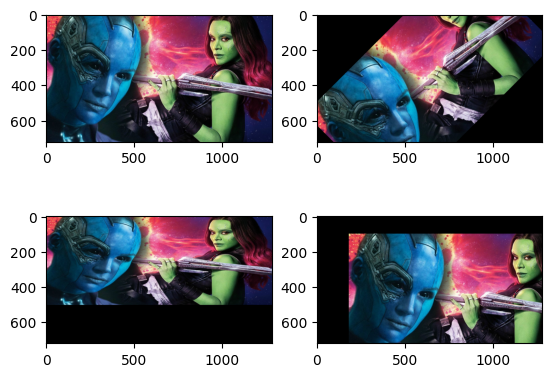

In [ ]:
from google.colab import files
uploaded = files.upload()

import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Abre imagem
#filename = sys.argv[1] # Comentamos a linha original

# Obtenha o nome do arquivo carregado do dicionário 'uploaded'
# Isso assume que apenas um arquivo foi carregado
for fn in uploaded.keys():
  filename = fn

im = cv2.imread(filename)

# Verifica se a imagem foi carregada corretamente
if im is None:
  print(f"Erro ao carregar a imagem: {filename}. Certifique-se de que o arquivo existe e é um formato de imagem válido.")
else:
  # converte pra RGB
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

  # dimensoes
  width = im.shape[1]
  height = im.shape[0]

  # matrizes de transformacao

  # rotation 45 graus
  x_center = width/2
  y_center = height/2
  M_rotation = cv2.getRotationMatrix2D((x_center,y_center),45,1)
  #M_rotation = cv2.getRotationMatrix2D((0,0),30,1)



  #M_rotation = np.float32([[0.86,0.5,0],[-0.5 ,0.86,0]])

  print(M_rotation)

  # scaling x 0.7
  M_scaling = np.float32([[1,0,0],[0,0.7,0]])

  # translation (180,100)
  M_translation = np.float32([[1,0,180],[0,1,100]])

  # cisalhamento horizontal e vertical
  # TODO

  # Computa as transformacoes
  im_rotated = cv2.warpAffine(im,M_rotation,(width,height))
  im_scaled = cv2.warpAffine(im,M_scaling,(width,height))
  im_translated = cv2.warpAffine(im,M_translation,(width,height))

  # mostra imagens em janelas separadas
  #cv2.imshow('original',im)
  #cv2.imshow('Rotate',im_rotated)
  #cv2.imshow('Scaling',im_scaled)
  #cv2.imshow('Translation',im_translated)
  #cv2.waitKey(0)
  #cv2.destroyAllWindows()

  # mostra imagens
  plt.subplot(221), plt.imshow(im, cmap='gray')
  plt.subplot(222), plt.imshow(im_rotated, cmap='gray')
  plt.subplot(223), plt.imshow(im_scaled, cmap='gray')
  plt.subplot(224), plt.imshow(im_translated, cmap='gray')
  plt.show()

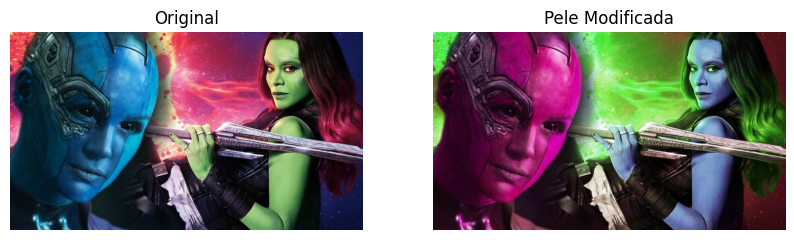

In [ ]:
from google.colab import files


import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt



filename = 'gamora_nebula.jpg'

# Abre imagem
im = cv2.imread(filename)

# Trata as excessões
# Verifica se a imagem foi carregada corretamente
if im is None:
  print(f"Erro ao carregar a imagem: {filename}. Certifique-se de que o arquivo existe e é um formato de imagem válido.")
else:
  # converte pra RGB para exibição com matplotlib
  im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

  # --- Detecção de pele ---
  # Vamos usar thresholds em espaços de cor YCrCb e HSV
  # Converte para YCrCb
  im_ycrcb = cv2.cvtColor(im, cv2.COLOR_BGR2YCrCb)

  # Define thresholds para cor de pele em YCrCb
  min_YCrCb = np.array([0, 133, 77], np.uint8)
  max_YCrCb = np.array([255, 173, 127], np.uint8)
  skin_mask_ycrcb = cv2.inRange(im_ycrcb, min_YCrCb, max_YCrCb)

  # Converte para HSV
  im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
  # Define thresholds para cor de pele em HSV
  # Estes thresholds podem precisar de ajuste dependendo da imagem específica
  min_HSV = np.array([0, 40, 0], np.uint8)
  max_HSV = np.array([25, 255, 255], np.uint8) # Ajustado o limite superior do matiz
  skin_mask_hsv = cv2.inRange(im_hsv, min_HSV, max_HSV)

  # Combina as máscaras
  skin_mask = cv2.bitwise_and(skin_mask_ycrcb, skin_mask_hsv)

  # --- Aplicação da transformação de cor ---
  # Cópia da imagem para aplicar a transformação
  im_skin_colored = im_rgb.copy()



  # Gamora ==> Verde (R=0, G=255, B=0)
  target_color_rgb = np.array([0, 255, 0], dtype=np.uint8)
  # Exemplo: Um tom de verde mais parecido com a Gamora (pode precisar de ajuste fino)
  # target_color_rgb = np.array([0, 150, 0], dtype=np.uint8)

  # Para uma mudança de matiz no espaço HSV, primeiro converta a cor alvo para HSV
  target_color_bgr = cv2.cvtColor(target_color_rgb.reshape(1,1,3), cv2.COLOR_RGB2BGR)
  target_color_hsv = cv2.cvtColor(target_color_bgr, cv2.COLOR_BGR2HSV).reshape(3)
  target_hue = target_color_hsv[0] # O valor do matiz da cor alvo

  # Converta a imagem para HSV para manipular o matiz
  im_hsv_colored = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

  # Máscara para obter apenas os pixels de pele na imagem HSV
  skin_pixels_hsv = cv2.bitwise_and(im_hsv_colored, im_hsv_colored, mask=skin_mask)

  # Altera o matiz (H) dos pixels de pele para o matiz alvo
  # Mantem a saturação (S) e o valor (V) originais
  skin_pixels_hsv[:, :, 0] = target_hue # Altera apenas o canal de matiz

  # Criar uma imagem onde apenas os pixels de pele têm a nova cor
  im_new_skin_hsv = im_hsv_colored.copy()
  # Criar uma máscara invertida para manter as áreas não-pele originais
  non_skin_mask = cv2.bitwise_not(skin_mask)
  # Combine a imagem original (áreas não-pele) com a imagem com pele colorida
  im_new_skin_hsv = cv2.bitwise_and(im_new_skin_hsv, im_new_skin_hsv, mask=non_skin_mask)
  im_new_skin_hsv = cv2.add(im_new_skin_hsv, skin_pixels_hsv)


  # Converta de volta para BGR ou RGB para exibição
  im_skin_colored_bgr = cv2.cvtColor(im_new_skin_hsv, cv2.COLOR_HSV2BGR)
  im_skin_colored_rgb = cv2.cvtColor(im_skin_colored_bgr, cv2.COLOR_BGR2RGB)

  # Mostra imagens
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1), plt.imshow(im_rgb)
  plt.title('Original')
  plt.axis('off')

  plt.subplot(1, 2, 2), plt.imshow(im_skin_colored_rgb)
  plt.title('Pele Modificada')
  plt.axis('off')

  plt.show()
